# Recommendation System

## Buildind data set

In [1]:
import pandas as pd
filename = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/4. Predictive/data_set_1.csv'
df_new_final = pd.read_csv(filename, sep=',', encoding='utf8')
df_new_final.head()

C:\Users\Casa\AppData\Local\Temp\ipykernel_9264\3895357795.py:3: DtypeWarning: Columns (8,14,15,16,17,36,38,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_new_final = pd.read_csv(filename, sep=',', encoding='utf8')


,id,Unnamed: 0,createTime,hashtags,tags,tags_full_name,tags_verified,isPaidPartnership,text,productType,...,tags_count,rank_tags,language,score,translation,translation_len,label_sentiment,score_sentiment,label_hate,score_hate
0,6822,1,2022-06-20 20:53:25+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,6824,2,2022-06-20 20:53:26+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,6825,3,2022-06-20 20:53:27+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,6922,4,2022-06-20 14:26:26+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,6972,5,2022-06-21 08:02:49+00:00,NaN,NaN,NaN,NaN,False,NaN,story,...,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [4]:
df_new_final.dtypes

id                     int64
Unnamed: 0             int64
createTime            object
hashtags              object
tags                  object
tags_full_name        object
tags_verified         object
isPaidPartnership       bool
text                  object
productType           object
InstagramUserId        int64
code                  object
likeCount              int64
commentCount           int64
desc                  object
s_tags                object
s_tags_full_name      object
s_tags_verified       object
mediaType              int64
productType.1         object
InstagramUserId.1      int64
fullName              object
username              object
isVerified              bool
country               object
year                   int64
month                  int64
day                    int64
quarter                int64
weekday                int64
weeknum                int64
year_month            object
quarter_year          object
tags_pre_count        object
tags_count    

In [2]:
# Here I will pick only the column with the id and the hashtags (if it comes the case I will pick the user instead since they will have more intereractions
df_try=df_new_final[["InstagramUserId.1","hashtags"]].copy()
df_try=df_try.dropna()
#Here we will order the user for each hashtag
df_try=df_try.sort_values(by=["InstagramUserId.1"])
#Need to withdraw all the # from the dataset
df_try['hashtags'] = df_try['hashtags'].str.replace('#', '')
df_try.head(5)


,InstagramUserId.1,hashtags
116923,144,hair;grwm;makeup;hair;grwm;makeup;hair;grwm;ma...
116926,144,zimmermann;mallorca;ootn;zimmermann;mallorca;ootn
116925,144,makeup;summermakeup;makeup;makeup;summermakeup...
116927,144,mallorca;ootd;zara
116929,144,ootn;summerstyle;mallorca


In [3]:
#Lets clean and sparse the data

#Sparsing now
df_try_3=df_try.hashtags.copy()
df_try_2=df_try_3.str.split(";")
htag_supp=pd.DataFrame(df_try_2)
htag_supp.columns=htag_supp.columns.str.replace("hashtags","hashtags_pre_count")
htags_split=pd.concat([df_try,htag_supp.set_index(df_try.index)],axis=1)
htags_split.head(5)

,InstagramUserId.1,hashtags,hashtags_pre_count
116923,144,hair;grwm;makeup;hair;grwm;makeup;hair;grwm;ma...,"[hair, grwm, makeup, hair, grwm, makeup, hair,..."
116926,144,zimmermann;mallorca;ootn;zimmermann;mallorca;ootn,"[zimmermann, mallorca, ootn, zimmermann, mallo..."
116925,144,makeup;summermakeup;makeup;makeup;summermakeup...,"[makeup, summermakeup, makeup, makeup, summerm..."
116927,144,mallorca;ootd;zara,"[mallorca, ootd, zara]"
116929,144,ootn;summerstyle;mallorca,"[ootn, summerstyle, mallorca]"


In [4]:
#Here I used to pick only a few lines, 100 on this case, and now I will using the entire dataset
htags_split_1=htags_split.copy()
#htags_split_1=htags_split.sample(100).copy()

In [5]:
#Create a list with all the hashtags used on the data frame
hashtags_unique=[]

for i in range(len(htags_split_1)):
    for x in range(len(htags_split_1.iat[i,2])):
        hashtags_unique.append(htags_split_1.iat[i,2][-x])

In [6]:
# Tasks to find the list of Ids and hashtags used on each post of id, we will have to understand how many hashtags we have
htags_count=[]
for i in range(len(htags_split_1)):
    htags_count.append(len(htags_split_1.iloc[i,2]))
htags_count=pd.DataFrame(htags_count, columns=["htags_count"])
htags_count=pd.concat([htags_split_1,htags_count.set_index(htags_split_1.index)],axis=1)

In [7]:
#Set a hashdata frame with both the ids and respective hashtag
from itertools import repeat

id_htags=[]
for i in range(len(htags_count)):
    for x in range(htags_count.iat[i,3]):  
        id_htags.append(list(repeat(htags_count.iloc[i,0], len(htags_count.iat[i,2])))[-x])
id_htags=pd.DataFrame(id_htags)

id_htags.columns=id_htags.columns.astype(str).str.replace("0","id")
hashtags_unique=pd.DataFrame(hashtags_unique,columns=["unique_htags"])
id_and_htag=pd.concat([id_htags,hashtags_unique.set_index(id_htags.index)],axis=1)
id_and_htag.head(5)

,id,unique_htags
0,144,hair
1,144,makeup
2,144,grwm
3,144,hair
4,144,makeup


In [8]:
#Here we will agregate the users for each of the hashtags
id_and_htag_1=pd.DataFrame(id_and_htag.groupby('id')['unique_htags'].value_counts())
id_and_htag_1.columns=id_and_htag_1.columns.str.replace("unique_htags","count_ref")
id_and_htag_1=id_and_htag_1.reset_index()
id_and_htag_1.head(5)

,id,unique_htags,count_ref
0,144,makeup,20
1,144,hair,15
2,144,grwm,12
3,144,getreadywithme,8
4,144,summermakeup,8


In [9]:
#Now to support the above data set we will have to bring an assessment, on this case the ranking of unique tags we will explore below
#Now we are to perform a count of unique values

#hashtags_unique
# we are now going to make a group by to understand how many references we have, count each, order them and make a rank, use the rank to allocate to the dataframe
htags_unique_2=pd.DataFrame(hashtags_unique.groupby('unique_htags')['unique_htags'].count())
htags_unique_2.columns=htags_unique_2.columns.str.replace("unique_htags","count")
htags_unique_2=htags_unique_2.reset_index()
htags_unique_2=htags_unique_2.sort_values(by=['count'],ascending=False)
htags_unique_2['htag_rank']=htags_unique_2['count'].rank(ascending=False).astype(int)
#Change the name of a column 
htags_unique_2.columns=htags_unique_2.columns.str.replace("unique_htags","uni_que_htags")

htags_unique_2.head(5)

,uni_que_htags,count,htag_rank
12909,portugal,2180,1
11804,ootd,2130,2
13389,pub,1300,3
5487,fashion,1300,3
17514,visitportugal,1299,5


In [10]:
#Now lets put all together the user_id, the hashtag, the number of times the user referred 
#the tag and the the tag rank (both an explicit and implicit feature
id_tag_sample=pd.merge(left=id_and_htag_1, right=htags_unique_2[['uni_que_htags','htag_rank']],how="left", left_on=["unique_htags"], right_on=["uni_que_htags"])
id_tag_sample=id_tag_sample.drop(labels='uni_que_htags', axis=1)

id_tag_sample

,id,unique_htags,count_ref,htag_rank
0,144,makeup,20,38
1,144,hair,15,646
2,144,grwm,12,309
3,144,getreadywithme,8,1197
4,144,summermakeup,8,1364
...,...,...,...,...
30649,1124,inspiredpv22,2,377
30650,1124,mellhorregressodesempre,2,3403
30651,1124,nosalive22,2,1085
30652,1124,parceria,2,134


In [11]:
#Support table with the unique user names
unique_ids_supp=df_new_final[['InstagramUserId','username']].copy()
unique_ids_supp=unique_ids_supp.dropna()
unique_ids_supp=unique_ids_supp.drop_duplicates('InstagramUserId')
unique_ids_supp

,InstagramUserId,username
0,149,conorryan75
3,157,laurab_mua
4,158,joannelarby
10,164,siobh.ohagan
12,165,jodiewood_
...,...,...
136300,711,lfmjacinto
138974,776,valterhugomae
139948,826,aftgomes21
140970,881,portugalcool


In [81]:
output_filename5 = 'C:/Users/Casa/OneDrive - Associação Porto Business School/Documents/MBA/0.3 Projeto DEUS/Test_Dataset/5. Recomendation System/first_sample_RS.csv'
id_tag_sample.to_csv(output_filename5, index=False)

In [ ]:
#Support: https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada#:~:text=The%20purpose%20of%20a%20recommender,briefly%20these%20two%20main%20paradigms.
#https://towardsdatascience.com/mixed-recommender-system-mf-matrix-factorization-with-item-similarity-based-cf-collaborative-544ddcedb330
#https://medium.com/mlearning-ai/what-are-the-types-of-recommendation-systems-3487cbafa7c9
#https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab
#https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-2-alternating-least-square-als-matrix-4a76c58714a1
#https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea
#https://pub.towardsai.net/recommendation-system-in-depth-tutorial-with-python-for-netflix-using-collaborative-filtering-533ff8a0e444

### 2. Building Model

In [83]:
#!pip install implicit

     -------------------------------------- 647.2/647.2 kB 2.9 MB/s eta 0:00:00


In [88]:
#!pip install scikit-surprise
#or but in the anaconda host
# conda install -c conda-forge scikit-surprise

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
  Running setup.py install for scikit-surprise: started
  Running setup.py install for scikit-surprise: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [76 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-39\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-39\surprise
  creating build\lib.win-amd64-

In [ ]:
#!pip install umap-learn
#or but in the anaconda host
# conda install -c conda-forge umap-learn

In [39]:
#!pip install seaborn

In [86]:
# standard libs
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix
from collections import defaultdict

# recommendations based on implicit signals
import implicit

# recommendations based on explicit signals
from surprise import Dataset, SVD, Reader
from surprise.model_selection import GridSearchCV

# visualization
import seaborn as sns
# map visualization
#import folium

# Projections for visualization
import umap
# Standarization of input features
from sklearn.preprocessing import StandardScaler

#### 2.1 Visualize Data

##### 2.1.1 Visualize Data

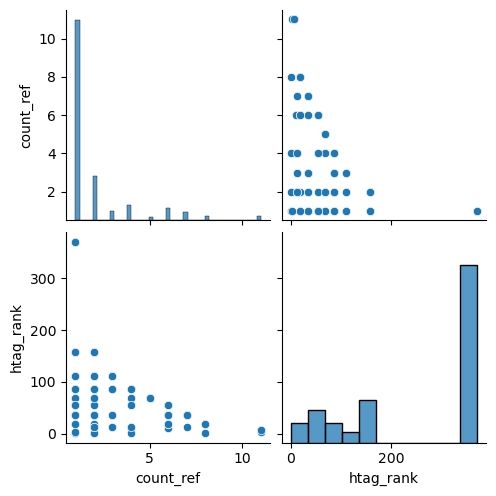

In [87]:
#Lets visualize the model
sns.pairplot(id_tag_sample[['count_ref', 'htag_rank']])

Conclusion from the graph above: 

##### 2.1.2 Diminish the dimensionality of the data (2 dimensions)

###### Sparse Matrix

In [88]:
#We will have to guarantee that the value of variables under category
id_tag_sample.dtypes
id_tag_sample['id'] = id_tag_sample['id'].astype("category")
id_tag_sample['unique_htags'] = id_tag_sample['unique_htags'].astype("category")
id_tag_chash=id_tag_sample[['id','unique_htags','count_ref']].copy()
#Add another column and withdraw the equal elements id and unique tags 

In [89]:
print(id_tag_chash.dtypes)
id_tag_chash

id              category
unique_htags    category
count_ref          int64
dtype: object


,id,unique_htags,count_ref
0,148,changingthefaceofbeauty,1
1,148,differentisbeautiful,1
2,148,dontbesorry,1
3,148,downrightperfect,1
4,148,downsyndrome,1
...,...,...,...
589,1045,cuidadoaquiaolado,1
590,1045,emboasmaos,1
591,1067,europeanyearofyouth,1
592,1104,foreoportugal,1


In [90]:
#Lets run the matrix
hashtags = coo_matrix((id_tag_chash['count_ref'].astype(float),
                   (id_tag_chash['unique_htags'].cat.codes, id_tag_chash['id'].cat.codes)))
hashtags

<545x92 sparse matrix of type '<class 'numpy.float64'>'
	with 594 stored elements in COOrdinate format>

###### Model Prediction

In [91]:
model = implicit.als.AlternatingLeastSquares(factors=32, alpha=40, )
model.fit(hashtags)

C:\Users\Casa\anaconda3\lib\site-packages\implicit\utils.py:33: UserWarning: Intel MKL BLAS detected. Its highly recommend to set the environment variable 'export MKL_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(
C:\Users\Casa\anaconda3\lib\site-packages\implicit\utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003016948699951172 seconds
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

###### Projection

In [92]:
hashtags_embeddings = model.item_factors

# standardize, i.e. z = (x - u) / s
X = StandardScaler().fit_transform(hashtags_embeddings)
# project to 2d space
hashtags_projections = umap.UMAP().fit_transform(X)

hashtags_projections = pd.DataFrame(columns=['x', 'y'], data=hashtags_projections)

# add hashtag rank
hashtag_rank = [list(id_tag_sample[id_tag_sample.id == i]["htag_rank"])[0]
              for i in id_tag_sample['id'].cat.categories]
#hotel_review_score = [list(hotels[hotels.hotel_id == i]["hotel_review_score"])[0]
#              for i in data['hotel_id'].cat.categories]
hashtags_projections['hashtag_rank'] = hashtag_rank
#hotel_projections['hotel_review_score'] = hotel_review_score

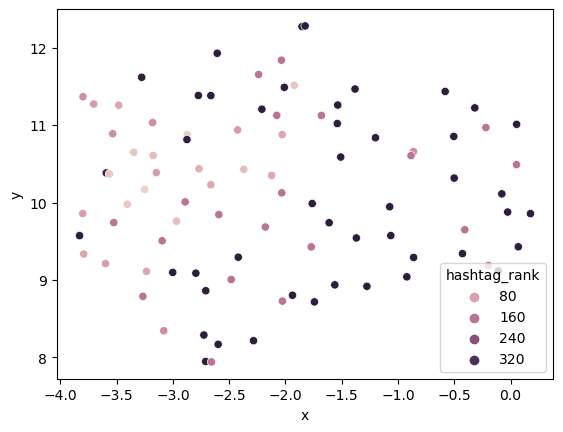

In [93]:
#sns.scatterplot(data=hashtags_projections, x="x", y="y", hue="hashtag_rank")
import matplotlib.pyplot as plt

sns.scatterplot(data=hashtags_projections, x="x", y="y", hue="hashtag_rank")
plt.show()


#### 2.2 Recommendation

In [94]:
user_id = 160
index = id_tag_sample['id'].cat.categories.get_loc(user_id)
compare_id=id_tag_sample[id_tag_sample.id == user_id]
id_tag_sample[id_tag_sample.id == user_id]

,id,unique_htags,count_ref,htag_rank
34,160,poolbrunch,2,158


In [127]:
index

0

In [95]:
#df_new_final["InstagramUserId.1"]
see_user_name=df_new_final[['InstagramUserId.1', 'fullName']].copy()
see_user_name.columns=see_user_name.columns.str.replace("InstagramUserId.1","user_id")
see_user_name[see_user_name.user_id == user_id].iloc[0,1]


C:\Users\Casa\AppData\Local\Temp\ipykernel_21244\2753948808.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  see_user_name.columns=see_user_name.columns.str.replace("InstagramUserId.1","user_id")


'Danielle O’ Brien ?Kildare'

In [96]:
#Lets select on the tags characteristics what type of tag is it
tags_by_count_hash = htags_unique_2[htags_unique_2.uni_que_htags.isin(id_tag_sample[id_tag_sample.id == user_id].unique_htags)]
tags_by_count_hash

,uni_que_htags,count,htag_rank
376,poolbrunch,2,158


In [97]:
# Recommendations:Pick the top choices of hashtags the model sugests

hashtags_index, hashtags_similarity = model.recommend(index, hashtags.tocsr()[index])

In [61]:
hashtags_index

array([68, 59, 42,  5, 56, 57, 13, 84, 46,  9])

In [59]:
hashtags_similarity

array([0.5640238 , 0.55062795, 0.5175698 , 0.48823792, 0.45749947,
       0.44784838, 0.3303868 , 0.32302666, 0.30352065, 0.30213338],
      dtype=float32)

In [98]:
##Pick from hashtag table the chracteristic associated to the hashtag per si

hash_tag_recommended = htags_unique_2[htags_unique_2.uni_que_htags.isin(id_tag_chash['unique_htags'].cat.categories[hashtags_index])]
hash_tag_recommended.insert(1, "similarity", hashtags_similarity)
hash_tag_recommended = hash_tag_recommended.sort_values(by=['similarity'], ascending=False)
hash_tag_recommended

#Improvement ideia: Bring here the topic modeling cluster is belongs to help either
#to see the cluster it belongs to, in order to make an assessment about the hashtag

,uni_que_htags,similarity,count,htag_rank
36,beachvibes,0.656606,4,87
43,beigeaesthetic,0.467168,2,158
82,contemporarytextileart,0.422553,1,371
32,bathroomrenovation,0.403726,1,371
28,babyinfluencer,0.378933,1,371
34,bbloggers,0.336447,1,371
15,amorproprio,0.325012,1,371
8,alliseeispretty,0.296350,1,371
67,chritmas,0.283485,1,371
62,caril,0.213257,1,371


In [99]:
#Understand if the type of person it is, if the recommendation make sense
see_user_name=df_new_final[['InstagramUserId.1', 'fullName']].copy()
see_user_name.columns=see_user_name.columns.str.replace("InstagramUserId.1","user_id")
see_user_name[see_user_name.user_id == user_id].iloc[0,1]


C:\Users\Casa\AppData\Local\Temp\ipykernel_21244\1875701321.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  see_user_name.columns=see_user_name.columns.str.replace("InstagramUserId.1","user_id")


'Danielle O’ Brien ?Kildare'

In [ ]:
#Plot the recommendation and the real values

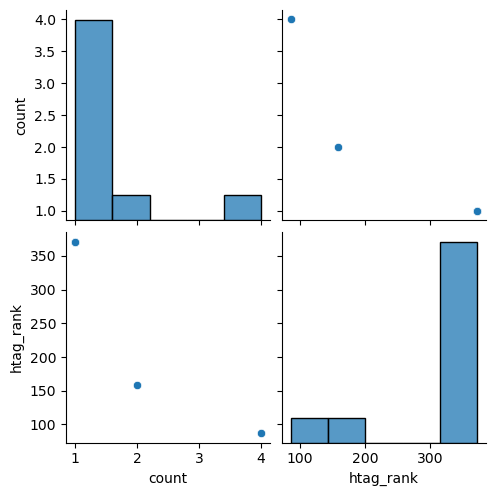

In [100]:
sns.pairplot(hash_tag_recommended[['count', 'htag_rank']])
plt.show()


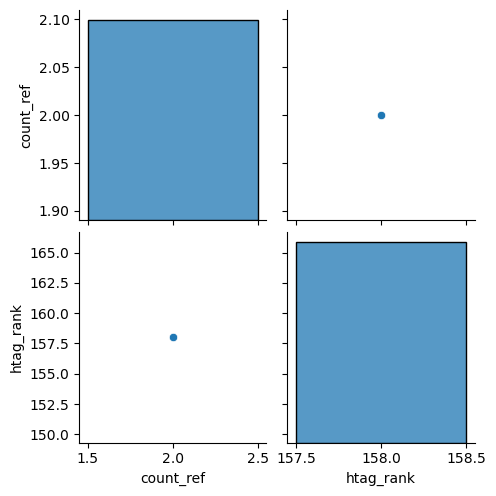

In [101]:
sns.pairplot(compare_id[['count_ref', 'htag_rank']])
plt.show()


Conclusion: individually the person makes sense to have some of the hashtags as a recommendation

#### 2.3 Simmilarity

In [102]:
# We will take the example for one tag to understand the idea behind the similarity by comparison with others
ref_tag_id = 'beachwearfashion'
ref_tag = htags_unique_2[htags_unique_2.uni_que_htags == ref_tag_id]
ref_tag

,uni_que_htags,count,htag_rank


In [103]:
# Check if the variables are category type to able to use on the model
print(htags_unique_2.dtypes)
htags_unique_2['uni_que_htags'] = htags_unique_2['uni_que_htags'].astype("category")
print(htags_unique_2.dtypes)


uni_que_htags    object
count             int64
htag_rank         int32
dtype: object
uni_que_htags    category
count               int64
htag_rank           int32
dtype: object


In [104]:
index_tag = id_tag_chash['unique_htags'].cat.categories.get_loc(ref_tag_id)
htags_sug_index, htags_sug_similarity = model.similar_items(index_tag)
htags_sug_ids = [id_tag_chash['unique_htags'].cat.categories[i] for i in htags_sug_index]
similar_htags_sug = pd.DataFrame(data={'tags_id': htags_sug_ids, 'similarity': htags_sug_similarity})
similar_htags_sug

#Source: https://towardsdatascience.com/alternating-least-square-for-implicit-dataset-with-code-8e7999277f4b

KeyError: 'beachwearfashion'

In [105]:
similar_tags = pd.merge(left=similar_htags_sug, right=htags_unique_2, how='left', left_on=['tags_id'], right_on=['uni_que_htags'])
similar_tags = similar_tags.sort_values(["similarity"], ascending=False)
similar_tags['similarity_weight'] = similar_tags['similarity'] *800
similar_tags

NameError: name 'similar_htags_sug' is not defined

In [ ]:
#scatter plot with different colours?

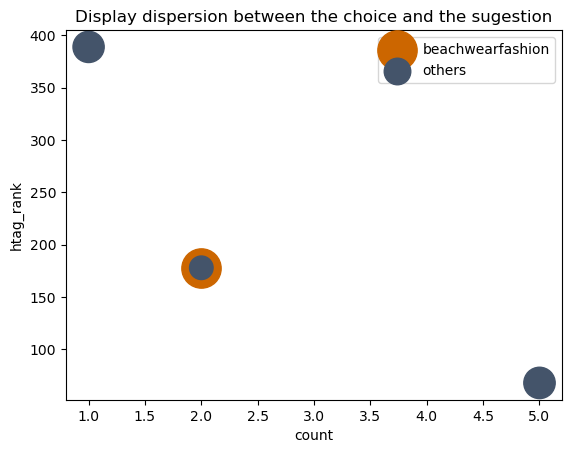

In [172]:
ax = similar_tags[similar_tags['tags_id']=='beachwearfashion'].plot.scatter(x='count', 
                                                           y='htag_rank', 
                                                           color='#CC6600', s='similarity_weight', label='beachwearfashion')
similar_tags[similar_tags['tags_id']!='beachwearfashion'].plot.scatter(x='count', 
                                                          y='htag_rank', 
                                                          color='#44546A', s='similarity_weight', label='others', ax=ax)

ax.set_title("Display dispersion between the choice and the sugestion")
plt.show()


#Source: https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py

#### 2.4 Explicit feedback

In [ ]:
reader = Reader(rating_scale=(min(id_tag_chash.count_ref), max(id_tag_chash.count_ref)))
df_count = Dataset.load_from_df(id_tag_chash[["id", "unique_htags", "count_ref"]], reader)

#Split of dataset between 
from surprise.model_selection import train_test_split
trainset_counts, testset_counts = train_test_split(df_count, test_size=0.25)

#trainset = df_count.build_full_trainset()

AttributeError: 'Trainset' object has no attribute 'build_full_trainset'

In [ ]:
algo = SVD(n_factors=32)
algo.fit(trainset_counts)

#### Grid Search for best parameters

In [ ]:
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(df_count)

print(gs.best_score["mae"])
print(gs.best_params["rmse"])

AttributeError: 'Trainset' object has no attribute 'raw_ratings'

#### Train and test

In [111]:
from surprise.model_selection import train_test_split
from surprise import accuracy

trainset_counts, testset_counts = train_test_split(df_count, test_size=0.25)
algo.fit(trainset_counts)
predictions = algo.test(testset_counts)

# Then compute RMSE / MAE
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 1.5119
MAE:  0.8630


0.8630342861877244

#### Train and test

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

# cosine similarities
# https://en.wikipedia.org/wiki/Cosine_similarity
X = cosine_similarity(algo.pu, algo.qi)

# 5 most similar items per user
indx = (-X.T).argsort()[:5].T
indx

array([[22, 65, 24, 29, 28],
       [79, 69, 84,  2, 51],
       [68, 51,  0,  8, 84],
       [11, 42, 63, 32, 75],
       [76, 76, 55, 13, 77],
       [33, 49, 29, 55, 63],
       [14, 58, 26, 22, 15],
       [ 6, 19, 47, 69, 21],
       [74, 12, 51, 52, 22],
       [ 9, 11, 59, 67, 12],
       [48, 41, 16, 46, 34],
       [65,  4, 61,  1, 40],
       [32, 64, 43, 21, 29],
       [15, 46, 20,  7, 26],
       [21, 83, 40, 14, 18],
       [82, 81, 17,  6, 61],
       [53, 27, 48, 40,  5],
       [47, 34, 60, 48, 39],
       [45, 24,  1, 18, 20],
       [84, 70, 14, 28, 23],
       [39, 54,  2, 80, 48],
       [19, 17, 32, 30, 52],
       [ 5, 53, 36, 42, 70],
       [18, 73, 22, 35,  0],
       [72,  0, 38, 63, 60],
       [52, 57, 80, 16, 79],
       [12, 84, 50, 43, 38],
       [75, 62, 71, 15, 19],
       [54, 37, 41, 24, 56],
       [ 8, 20, 78, 41,  2],
       [63, 75, 54, 74, 66],
       [60, 38, 49, 20, 37],
       [55, 72, 28, 77, 46],
       [20, 22, 81, 61, 31],
       [41, 33

In [115]:
X = StandardScaler().fit_transform(algo.qi)
embeddings = umap.UMAP().fit_transform(X)

x = [trainset_counts.to_raw_iid(i) for i in trainset_counts.all_items()]
#hotel_starrating = [list(hotels[hotels.hotel_id == i]['hotel_starrating'].values)[0]  for i in x]
#hotel_review_score = [list(hotels[hotels.hotel_id == i]['hotel_review_score'].values)[0]  for i in x]

projection = pd.DataFrame(columns=['x', 'y'], data=embeddings)
#projection['hotel_starrating'] = hotel_starrating
#projection['hotel_review_score'] = hotel_review_score

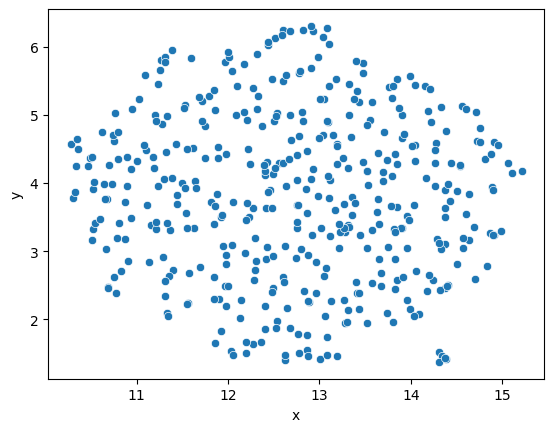

In [116]:
sns.scatterplot(data=projection, x="x", y="y")
plt.show()


### Train xgboost

In [173]:
id_tag_chash

,id,unique_htags,count_ref
0,160,fblogger,1
1,160,killer,1
2,160,motd,1
3,160,reels,1
4,160,stungbyawasp,1
...,...,...,...
603,1028,fashionblogger,4
604,1028,fashionreels,4
605,1028,summerdress,4
606,1028,vestidosdeverao,4


In [143]:
model.similar_items(2)

(array([ 2,  8, 52, 84, 60,  9, 44, 57, 61, 59]),
 array([1.0000001 , 0.5144756 , 0.4322196 , 0.30117717, 0.28924903,
        0.28464127, 0.28154942, 0.24875778, 0.24327555, 0.23900002],
       dtype=float32))

In [102]:


#htags_unique_2
#d.type(htags_unique_2)
print(htags_unique_2.dtypes)
#id_tag_chash

uni_que_htags    object
count             int64
htag_rank         int32
dtype: object


In [107]:
model.similar_items(1)

(array([ 1, 74, 18, 55,  3, 62, 70, 17, 83, 32]),
 array([1.0000001 , 0.5992985 , 0.51297724, 0.43802637, 0.4334925 ,
        0.41314235, 0.40771788, 0.38479203, 0.36359066, 0.3547585 ],
       dtype=float32))

In [108]:
id_tag_chash

,id,unique_htags,count_ref
0,160,fblogger,1
1,160,killer,1
2,160,motd,1
3,160,reels,1
4,160,stungbyawasp,1
...,...,...,...
603,1028,fashionblogger,4
604,1028,fashionreels,4
605,1028,summerdress,4
606,1028,vestidosdeverao,4


In [114]:
support_dat_frame=id_tag_chash[['unique_htags']].copy()
support_dat_frame_1 = support_dat_frame.drop_duplicates(keep='first')
len(support_dat_frame_1)

545

In [118]:
support_dat_frame_2=id_tag_chash[['id']].copy()
support_dat_frame_3 = support_dat_frame_2.drop_duplicates(keep='first')
len(support_dat_frame_3)

88

In [128]:
hashtags.tocsr()[0]

<1x545 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

### 3. Collaborative Filtering

#### 3.1 Split of train and test dataset

In [ ]:
#Source: https://pub.towardsai.net/recommendation-system-in-depth-tutorial-with-python-for-netflix-using-collaborative-filtering-533ff8a0e444

In [35]:
#Adjust to create a table possible to be sparce (with just numeric values)
#Criar um index numerico
htags_unique_index=htags_unique_2.copy()
htags_unique_index.insert(0,'index_tags',range(0,0+len(htags_unique_index)))

#Join the nuemric values to the dataframe
id_tag_index=id_tag_sample.copy()
id_tag_ind_num=pd.merge(left=id_tag_index, right=htags_unique_index[['uni_que_htags','index_tags']],how="left", left_on=["unique_htags"], right_on=["uni_que_htags"])
id_tag_ind_num=id_tag_ind_num.drop(labels=['uni_que_htags','unique_htags'], axis=1)

id_tag_ind_num

,id,count_ref,htag_rank,index_tags
0,148,1,371,415
1,148,1,371,331
2,148,1,371,328
3,148,1,371,326
4,148,1,371,325
...,...,...,...,...
589,1045,1,371,337
590,1045,1,371,371
591,1067,1,371,370
592,1104,1,371,433


In [36]:
#For the time being we will split the dataframe between train and test data set
split_value = int(len(id_tag_ind_num) * 0.80)
train_data = id_tag_ind_num[:split_value]
test_data = id_tag_ind_num[split_value:]


In [40]:
#Create User-Item Sparse Matrix
from scipy import sparse


def get_user_item_sparse_matrix(id_tag_sample):
    sparse_data = sparse.csr_matrix((id_tag_sample.count_ref, (id_tag_sample.id, id_tag_sample.index_tags)))
    return sparse_data

#User-item Train Sparse matrix
train_sparse_data = get_user_item_sparse_matrix(train_data)

#User-item test sparse matrix
test_sparse_data = get_user_item_sparse_matrix(test_data)

#Global Average Rating
global_average_rating = train_sparse_data.sum()/train_sparse_data.count_nonzero()
print("Global Average tags used: {}".format(global_average_rating))



Global Average tags used: 1.9852631578947368


#### 3.2 Understand Cold Start Problem

In [46]:
# Calculate the average hashtags
import numpy as np
def get_average_hash_tags_used(sparse_matrix, is_user):
    ax = 1 if is_user else 0
    sum_of_hashtags = sparse_matrix.sum(axis = ax).A1  
    no_of_hashtags = (sparse_matrix != 0).sum(axis = ax).A1 
    rows, cols = sparse_matrix.shape
    average_hashtags = {i: sum_of_hashtags[i]/no_of_hashtags[i] for i in range(rows if is_user else cols) if no_of_hashtags[i] != 0}
    return average_hashtags

# Average number of User
average_user_hahstag_use = get_average_hash_tags_used(train_sparse_data, True)

#Average Hashtags Hashtag
avg_hashtag_use = get_average_hash_tags_used(train_sparse_data, False)

#Check Cold Start Problem: User

total_users = len(np.unique(id_tag_ind_num["id"]))
train_users = len(average_user_hahstag_use)
uncommonUsers = total_users - train_users
                  
print("Total no. of Users = {}".format(total_users))
print("No. of Users in train data= {}".format(train_users))
print("No. of Users not present in train data = {}({}%)".format(uncommonUsers, np.round((uncommonUsers/total_users)*100), 2))


# Check Cold Start Problem: Hashtag

total_hashtags = len(np.unique(id_tag_ind_num["index_tags"]))
train_hashtags = len(avg_hashtag_use)
uncommonHashtags = total_hashtags - train_hashtags
                  
print("Total no. of Hashtags = {}".format(total_hashtags))
print("No. of Hashtags in train data= {}".format(train_hashtags))
print("No. of Hashtags not present in train data = {}({}%)".format(uncommonHashtags, np.round((uncommonHashtags/total_hashtags)*100), 2))

Total no. of Users = 92
No. of Users in train data= 72
No. of Users not present in train data = 20(22.0%)
Total no. of Hashtags = 545
No. of Hashtags in train data= 448
No. of Hashtags not present in train data = 97(18.0%)


In [53]:
train_sparse_data

<708x545 sparse matrix of type '<class 'numpy.int64'>'
	with 475 stored elements in Compressed Sparse Row format>

Analysis: 
Since we divided the dataset to construct the sparse matrix, we lost 22% of the original users that are now not present on the train dataset, this means that the recomendations for these users will not be robust, since we have no historical data from these. 

We do not possess either 18% of the hashtags in the training set that were at our disposal on the original dataset, and will not therefore be part of the sugestions of our recommendation system

#### 3.3 Similarity Matrix

In [60]:
#Compute User Similarity Matrix
from sklearn.metrics.pairwise import cosine_similarity

def compute_user_similarity(sparse_matrix, limit=100):
    row_index, col_index = sparse_matrix.nonzero()
    rows = np.unique(row_index)
    similar_arr = np.zeros(62200).reshape(622,100)
    
    for row in rows[:limit]:
        sim = cosine_similarity(sparse_matrix.getrow(row), train_sparse_data).ravel()
        similar_indices = sim.argsort()[-limit:]
        similar = sim[similar_indices]
        similar_arr[row] = similar
    
    return similar_arr

similar_user_matrix = compute_user_similarity(train_sparse_data, 0)

similar_user_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [78]:
#Compute Hashtags Similarity Matrix
def compute_hashtags_similarity_count(sparse_matrix, htags_unique_index, index_tags):
    similarity = cosine_similarity(sparse_matrix.T, dense_output = False)
    no_of_similar_hashtags = htags_unique_index.loc[index_tags][1], similarity[index_tags].count_nonzero()
    return no_of_similar_hashtags

#Now draw a similar movies list:
similar_hashtag= compute_hashtags_similarity_count(train_sparse_data, htags_unique_index,2)
print("Similar Hashtags = {}".format(similar_hashtag))

Similar Hashtags = ('ad', 9)


#### 3.4 Building the Machine Learning Model

In [ ]:
x_train = train_new_similar_features.drop(["user_id", "movie_id", "rating"], axis = 1)

x_test = test_new_similar_features.drop(["user_id", "movie_id", "rating"], axis = 1)

y_train = train_new_similar_features["rating"]

y_test = test_new_similar_features["rating"]

### 4. Third Try

### 4.1 KNN Algorithm

In [ ]:
#Source: http://muricoca.github.io/crab/install.html#installing-an-official-release
#Source: https://blog.chapagain.com.np/recommender-system-using-python-crab/
# https://www.kaggle.com/code/gspmoreira/recommender-systems-in-python-101#Collaborative-Filtering-model

#Try this one for last
#https://towardsdatascience.com/recommender-systems-matrix-factorization-using-pytorch-bd52f46aa199

In [12]:
#Adjust to create a table possible to be sparce (with just numeric values)
#Criar um index numerico
htags_unique_index=htags_unique_2.copy()
htags_unique_index.insert(0,'index_tags',range(0,0+len(htags_unique_index)))

#Join the nuemric values to the dataframe
id_tag_index=id_tag_sample.copy()
id_tag_ind_num=pd.merge(left=id_tag_index, right=htags_unique_index[['uni_que_htags','index_tags']],how="left", left_on=["unique_htags"], right_on=["uni_que_htags"])
id_tag_ind_num=id_tag_ind_num.drop(labels=['uni_que_htags','unique_htags'], axis=1)

id_tag_ind_num

,id,count_ref,htag_rank,index_tags
0,144,20,38,37
1,144,15,646,640
2,144,12,309,307
3,144,8,1197,1192
4,144,8,1364,1366
...,...,...,...,...
30649,1124,2,377,377
30650,1124,2,3403,3356
30651,1124,2,1085,1090
30652,1124,2,134,133


In [13]:
#Source: https://notebook.community/NicolasHug/Surprise/examples/notebooks/KNNBasic_analysis
knn_input=id_tag_ind_num[['id','index_tags','count_ref']].copy()

from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic
from surprise.accuracy import rmse
from surprise.accuracy import mse
from surprise.accuracy import mae


reader = Reader(rating_scale =(min(knn_input.count_ref), max(knn_input.count_ref)))
df_user_model = Dataset.load_from_df(knn_input[["id", "index_tags",'count_ref']], reader)
#trainset_1 = df_user_model.build_full_trainset()


#Split of training and test data
trainset, testset = train_test_split(df_user_model, test_size=0.25)

#Lets try new configurations
sim_options={
    "name": "cosine", #This distance metric is used mainly to calculate similarity between two vectors. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in the same direction. It is often used to measure document similarity in text analysis.
    "user_based": True,  # compute  similarities between users
}
algo = KNNBasic(sim_options=sim_options)

#Lets fit the model to the trainset
algo.fit(trainset)

#Lets fit the model to the trainset
predictions=algo.test(testset)
rmse_knn=rmse(predictions)
mse_knn=mse(predictions)
mae_knn=mae(predictions)

#Analyse a coldcall assessment
#Look for an example


#Evalution through:
    #MAP
    #NDCG

#Questions?
#Offline evaluation? (hidden and observed?)

#Try Collaborative Filtering



Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 23.4942
MSE: 551.9758
MAE:  9.6171


In [14]:
# Let's build a pandas dataframe with all the predictions
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

results = pd.DataFrame(predictions, columns=['User_id', 'Item_id', 'Real_count', 'Estimated_Count', 'Details'])    
results['User_Rated_Items'] = results.User_id.apply(get_Iu)
results['Users_Rated_Item'] = results.Item_id.apply(get_Ui)
results['error'] = abs(results.Estimated_Count - results.Real_count)
results

,User_id,Item_id,Real_count,Estimated_Count,Details,User_Rated_Items,Users_Rated_Item,error
0,613,5156,7.0,7.821792,"{'was_impossible': True, 'reason': 'User and/o...",19,0,0.821792
1,181,15767,1.0,7.821792,"{'was_impossible': True, 'reason': 'User and/o...",20,0,6.821792
2,391,2067,20.0,7.821792,"{'was_impossible': True, 'reason': 'User and/o...",165,0,12.178208
3,262,1,5.0,13.428442,"{'actual_k': 20, 'was_impossible': False}",21,67,8.428442
4,739,8307,1.0,2.000000,"{'actual_k': 1, 'was_impossible': False}",109,1,1.000000
...,...,...,...,...,...,...,...,...
7659,376,2835,14.0,7.821792,"{'was_impossible': True, 'reason': 'User and/o...",41,0,6.178208
7660,292,3957,2.0,2.000000,"{'actual_k': 1, 'was_impossible': False}",76,4,0.000000
7661,667,8577,3.0,7.821792,"{'was_impossible': True, 'reason': 'User and/o...",26,0,4.821792
7662,810,1212,2.0,2.000000,"{'actual_k': 1, 'was_impossible': False}",27,1,0.000000


In [15]:
best_predictions = results.sort_values(by='error')[:10]
worst_predictions = results.sort_values(by='error')[-10:]
best_predictions

,User_id,Item_id,Real_count,Estimated_Count,Details,User_Rated_Items,Users_Rated_Item,error
2893,400,3882,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",127,4,0.0
4933,400,7260,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",127,1,0.0
1682,248,1667,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",26,3,0.0
4918,229,11493,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",121,1,0.0
4904,818,5860,2.0,2.0,"{'actual_k': 1, 'was_impossible': False}",24,1,0.0
1706,748,11425,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",115,1,0.0
1738,711,2586,2.0,2.0,"{'actual_k': 1, 'was_impossible': False}",203,1,0.0
4825,456,5565,3.0,3.0,"{'actual_k': 1, 'was_impossible': False}",201,1,0.0
7089,633,8886,1.0,1.0,"{'actual_k': 1, 'was_impossible': False}",93,2,0.0
343,400,7558,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",127,2,0.0


#### 4.1.1 Cross Validation methods

##### a) K Folds Cross Validation
A basic cross-validation iterator.

In [16]:
#https://surprise.readthedocs.io/en/stable/getting_started.html#use-cross-validation-iterators
#https://ansegura7.github.io/RS_Surprise/pages/RS_KNN.html
from surprise import accuracy, Dataset

from surprise.model_selection import KFold

# define a cross-validation iterator
n_splits=4

kf = KFold(n_splits)

algo = KNNBasic(sim_options=sim_options)

acc_kfold_rmse=[]
acc_kfold_mse=[]
acc_kfold_mae=[]
for trainset, testset in kf.split(df_user_model):
# train and test algorithm.
    algo.fit(trainset)
    predictions_knn_k_fold = algo.test(testset)

# Compute and print Root Mean Squared Error
    acc_kfold_rmse.append(accuracy.rmse(predictions_knn_k_fold, verbose=True))
    acc_kfold_mse.append(accuracy.mse(predictions_knn_k_fold, verbose=True))
    acc_kfold_mae.append(accuracy.mae(predictions_knn_k_fold, verbose=True))

#Panda Data frame with results
import itertools
int_num = list(itertools.chain(range(1, n_splits+1)))

kfold_acc=pd.DataFrame(list(zip(int_num,acc_kfold_rmse, acc_kfold_mse, acc_kfold_mae)),
              columns=['k_fol_number','rmse_kfold','mse_kfold', 'mae_kfold'])
kfold_acc

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 25.7332
MSE: 662.1991
MAE:  9.8172
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 24.9388
MSE: 621.9428
MAE:  9.7094
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 24.2418
MSE: 587.6638
MAE:  9.5376
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 23.7025
MSE: 561.8063
MAE:  9.5233


,k_fol_number,rmse_kfold,mse_kfold,mae_kfold
0,1,25.733229,662.199057,9.817167
1,2,24.938781,621.942783,9.709390
2,3,24.241777,587.663768,9.537574
3,4,23.702453,561.806285,9.523265


##### b) RepeatedKFold
Repeated KFold cross validator.

In [17]:
from surprise import accuracy, Dataset

from surprise.model_selection import RepeatedKFold

# define a cross-validation iterator
n_splits=4
n_repeats=5
random_state=42

kf_repeat = RepeatedKFold(n_splits=n_splits,n_repeats=n_repeats,random_state=random_state)

algo_knn = KNNBasic(sim_options=sim_options)

for trainset, testset in kf_repeat.split(df_user_model):
# train and test algorithm.
    algo_knn.fit(trainset)
    predictions_knn_k_fold_repeat = algo_knn.test(testset)
    
# Compute and print Root Mean Squared Error
    accuracy.rmse(predictions_knn_k_fold_repeat, verbose=True)
    accuracy.mse(predictions_knn_k_fold_repeat, verbose=True)
    accuracy.mae(predictions_knn_k_fold_repeat, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 24.3998
MSE: 595.3478
MAE:  9.5711
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 24.8915
MSE: 619.5879
MAE:  9.7649
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 24.4515
MSE: 597.8767
MAE:  9.7127
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 25.9216
MSE: 671.9307
MAE:  9.7072
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 23.9506
MSE: 573.6295
MAE:  9.4969
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 26.3823
MSE: 696.0256
MAE:  9.9845
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 26.3914
MSE: 696.5048
MAE:  9.8760
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 24.5508
MSE: 602.7441
MAE:  9.6444
Computing the cosine similarity matrix...
Done computing similar

##### c) ShuffleSplit
A basic cross-validation iterator with random trainsets and testsets.

In [18]:
from surprise import accuracy, Dataset

from surprise.model_selection import ShuffleSplit

# define a cross-validation iterator
n_splits=4
test_size=0.3
random_state=42
shuffle=True

kf_shuffle = ShuffleSplit(n_splits=n_splits,test_size=test_size,random_state=random_state,shuffle=shuffle)

algo_knn = KNNBasic(sim_options=sim_options)

for trainset, testset in kf_shuffle.split(df_user_model):
# train and test algorithm.
    algo_knn.fit(trainset)
    predictions_knn_k_fold_shuffle = algo_knn.test(testset)
    
# Compute and print Root Mean Squared Error
    accuracy.rmse(predictions_knn_k_fold_shuffle, verbose=True)
    accuracy.mse(predictions_knn_k_fold_shuffle, verbose=True)
    accuracy.mae(predictions_knn_k_fold_shuffle, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 25.3889
MSE: 644.5963
MAE:  9.6725
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 24.9158
MSE: 620.7962
MAE:  9.6734
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 25.3598
MSE: 643.1217
MAE:  9.8534
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 23.6690
MSE: 560.2206
MAE:  9.6077


##### d) LeaveOneOut
Cross-validation iterator where each user has exactly one rating in the testset.

In [19]:
from surprise import accuracy, Dataset

from surprise.model_selection import LeaveOneOut

# define a cross-validation iterator
n_splits=4
min_n_ratings =1
random_state=42

kf_one_out = LeaveOneOut(n_splits=n_splits,random_state=random_state,min_n_ratings=min_n_ratings)

algo_knn = KNNBasic(sim_options=sim_options)

for trainset, testset in kf_one_out.split(df_user_model):
# train and test algorithm.
    algo_knn.fit(trainset)
    predictions_knn_k_fold_loo = algo_knn.test(testset)
    
# Compute and print Root Mean Squared Error
    accuracy.rmse(predictions_knn_k_fold_loo, verbose=True)
    accuracy.mse(predictions_knn_k_fold_loo, verbose=True)
    accuracy.mae(predictions_knn_k_fold_loo, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 14.9999
MSE: 224.9983
MAE:  7.5237
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 18.7362
MSE: 351.0446
MAE:  8.3680
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 16.4226
MSE: 269.7031
MAE:  7.2885
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 20.5754
MSE: 423.3475
MAE:  8.5783


##### e) Simple Cross Validation

In [22]:
#Automatic cross-validation
from surprise.model_selection import cross_validate

cross_validate(algo, df_user_model, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    23.5733 22.8372 22.1323 26.5070 28.3811 24.6862 2.3726  
MAE (testset)     9.5210  9.5654  9.1745  9.8981  10.1022 9.6522  0.3212  
Fit time          0.05    0.03    0.03    0.05    0.03    0.04    0.01    
Test time         0.13    0.08    0.08    0.06    0.07    0.09    0.02    


{'test_rmse': array([23.57330545, 22.83722311, 22.13232941, 26.50698792, 28.38113118]),
 'test_mae': array([ 9.52097353,  9.56543624,  9.17447895,  9.89806222, 10.10216135]),
 'fit_time': (0.04828906059265137,
  0.03124403953552246,
  0.031151294708251953,
  0.05047178268432617,
  0.03163027763366699),
 'test_time': (0.12699580192565918,
  0.07916617393493652,
  0.08460879325866699,
  0.0626213550567627,
  0.07212138175964355)}

##### f) Representation from KNN error through the number of neighbours

In [20]:
#Lets conduct a cross validation and assess the error along the difference cross validation set
def rmse_vs_neighbours(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = KNN e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 101, 1):
    algo_knn_display = algorithm(n_neighbours = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce_knn = cross_validate(algo_knn_display, df_user_model, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce_knn)
  
  return rmse_algorithm

In [23]:
rmse_knn = rmse_vs_neighbours(KNNBasic,df_user_model)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [24]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of neighbours. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Neighbours".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 52, step=2))

  plt.xlabel("{0}(n_neighbour = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

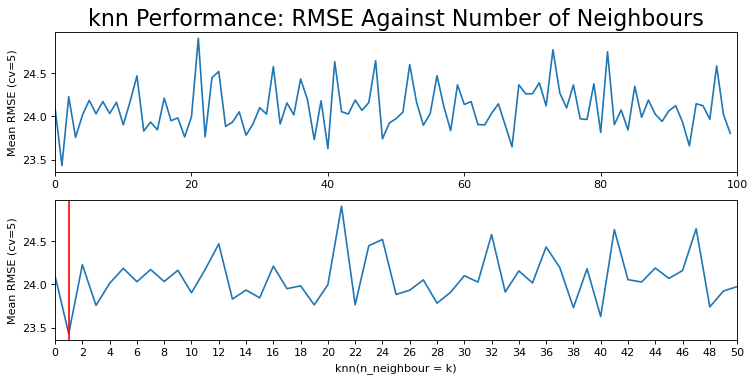

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plot_rmse(rmse_knn,"knn")

#### 4.1.2 Tune Hyperparameters

In [26]:
from surprise import Dataset
from surprise.model_selection import GridSearchCV

param_grid = {
    'k': [10, 20, 32],
    'min_k':[1,3],
    'sim_options': {
        'name': ['msd', 'cosine'], #;SD=Mean Squared Difference
        'min_support': [1, 5],
        'user_based': [True],
    },
}

gs_knn = GridSearchCV(KNNBasic, param_grid, measures=["rmse","mse", "mae"], cv=3)

gs_knn.fit(df_user_model)

# best RMSE score
print(gs_knn.best_score["rmse"])

# combination of parameters that gave the best RMSE score
print(gs_knn.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

In [27]:
from surprise import accuracy, Dataset
import numpy as np
#Split of training and test data
trainset, testset = train_test_split(df_user_model, test_size=0.25)

#Now lets use the tunned hyperparameters for our models
algo_knn_tune = gs_knn.best_estimator["rmse"]
algo_knn_tune.fit(trainset)
predictions_knn_opt=algo_knn_tune.test(testset)


rmse_knn_tune=accuracy.rmse(predictions_knn_opt, verbose=True)
mse_knn_tune=accuracy.mse(predictions_knn_opt, verbose=True)
mae_knn_tune=accuracy.mae(predictions_knn_opt, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 24.0593
MSE: 578.8488
MAE:  8.9091


In [28]:
# Let's build a pandas dataframe with all the predictions
def get_Iu_knn(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui_knn(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0


results_knn_tune = pd.DataFrame(predictions_knn_opt, columns=['User_id', 'Item_id', 'Real_count', 'Estimated_Count', 'Details'])    
results_knn_tune['User_Rated_Hashtags'] = results_knn_tune.User_id.apply(get_Iu_knn)
results_knn_tune['User_Rated_Hashtags'] = results_knn_tune.Item_id.apply(get_Ui_knn)
results_knn_tune['error'] = abs(results_knn_tune.Estimated_Count - results_knn_tune.Real_count)

results_knn_tune_1=pd.merge(left=results_knn_tune, right=htags_unique_index[['index_tags', 'uni_que_htags', 'htag_rank']],how='left', left_on=['Item_id'], right_on=['index_tags'])
results_knn_tune_2=pd.merge(left=results_knn_tune_1, right=unique_ids_supp[['InstagramUserId', 'username']],how='left', left_on=['User_id'], right_on=['InstagramUserId'])
results_knn_tune_2=results_knn_tune_2.drop(columns=['index_tags','InstagramUserId'])

best_predictions_knn_tune = results_knn_tune_2.sort_values(by='error')[:10]
worst_predictions_knn_tune = results_knn_tune_2.sort_values(by='error')[-10:]
best_predictions_knn_tune

,User_id,Item_id,Real_count,Estimated_Count,Details,User_Rated_Hashtags,error,uni_que_htags,htag_rank,username
6682,664,1925,1.0,1.000000,"{'actual_k': 3, 'was_impossible': False}",4,0.000000,poolday,1942,patriciaqsoares21
1975,459,25,2.0,1.997182,"{'actual_k': 10, 'was_impossible': False}",26,0.002818,lifestyle,26,silvanaccdias
5501,718,5,11.0,11.004212,"{'actual_k': 10, 'was_impossible': False}",29,0.004212,outfit,6,ines.stm
6322,760,148,8.0,7.995369,"{'actual_k': 7, 'was_impossible': False}",18,0.004631,paris,149,yolanda.tati
84,575,56,3.0,2.995234,"{'actual_k': 10, 'was_impossible': False}",25,0.004766,vacation,57,nuno_gemeos_moreira
1925,753,1433,1.0,1.008411,"{'actual_k': 3, 'was_impossible': False}",6,0.008411,positivevibes,1446,teixeiramafalda
4535,512,481,1.0,1.013497,"{'actual_k': 3, 'was_impossible': False}",6,0.013497,top,480,martasrj
5296,875,1640,2.0,2.014415,"{'actual_k': 3, 'was_impossible': False}",5,0.014415,bolo,1620,casalmisterio
7124,753,41,3.0,2.983742,"{'actual_k': 10, 'was_impossible': False}",36,0.016258,beach,42,teixeiramafalda
4453,459,2066,3.0,2.980413,"{'actual_k': 4, 'was_impossible': False}",6,0.019587,loveislove,2101,silvanaccdias


In [29]:
knn_input=id_tag_ind_num[['id','index_tags','count_ref']].copy()

knn_input.columns=knn_input.columns.str.replace("id","user_id")
def get_top_n_knn(predictions_knn_opt, user_id, htags_unique_index, knn_input, n = 10):
    '''Return the top N (default) hashatgs for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Peart I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions_knn_opt:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = knn_input[knn_input.user_id == (user_id)]
    print('User {0} has already USED {1} HASHTAGS.'.format(user_id, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["user_id" ,"index_tags","count_ref"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["user_id"] == (user_id)].merge(htags_unique_index, how = 'left', left_on = 'index_tags', right_on = 'index_tags')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = knn_input[knn_input.user_id == (user_id) ].sort_values("count_ref", ascending = False).merge\
    (htags_unique_index, how = 'left', left_on = 'index_tags', right_on = 'index_tags')

    return hist_usr, pred_usr

In [106]:
#knn Recommendations

hist_knn_124, pred_SVD_124 = get_top_n_knn(predictions_knn_opt, htags_unique_index = htags_unique_index, user_id = 644, knn_input = knn_input)
hist_knn_124.head(10)

User 644 has already USED 139 HASHTAGS.


,user_id,index_tags,count_ref,uni_que_htags,count,htag_rank
0,644,1633,20,fcporto,27,1620
1,644,2136,20,soccerworld,20,2101
2,644,2568,16,awaydays,16,2520
3,644,2456,16,ultrasgirl,16,2520
4,644,14,12,porto,880,15
5,644,0,10,portugal,2180,1
6,644,3670,10,ultrasworld,10,3672
7,644,3674,10,ultrasmentality,10,3672
8,644,3766,10,soccerlife,10,3672
9,644,3826,10,soccergirls,10,3672


In [115]:
id_tag_ind_num

,id,count_ref,htag_rank,index_tags
0,144,20,38,37
1,144,15,646,640
2,144,12,309,307
3,144,8,1197,1192
4,144,8,1364,1366
...,...,...,...,...
30649,1124,2,377,377
30650,1124,2,3403,3356
30651,1124,2,1085,1090
30652,1124,2,134,133


### 4.2 SVD

#### 4.2.1 Clean data set

Source: https://www.jiristodulka.com/post/recsys_cf/

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from collections import defaultdict #data colector

#Surprise: https://surprise.readthedocs.io/en/stable/
import surprise

from surprise.reader import Reader
from surprise import Dataset
from surprise.model_selection import GridSearchCV

  ##CrossValidation
from surprise.model_selection import cross_validate


  ##Matrix Factorization Algorithms
from surprise import SVD
from surprise import NMF

In [31]:
#Adjust to create a table possible to be sparce (with just numeric values)
#Criar um index numerico
htags_unique_index=htags_unique_2.copy()
htags_unique_index.insert(0,'index_tags',range(0,0+len(htags_unique_index)))

#Join the nuemric values to the dataframe
id_tag_index=id_tag_sample.copy()
id_tag_ind_num=pd.merge(left=id_tag_index, right=htags_unique_index[['uni_que_htags','index_tags']],how="left", left_on=["unique_htags"], right_on=["uni_que_htags"])
id_tag_ind_num=id_tag_ind_num.drop(labels=['uni_que_htags','unique_htags'], axis=1)

id_tag_ind_num

,id,count_ref,htag_rank,index_tags
0,144,20,38,37
1,144,15,646,640
2,144,12,309,307
3,144,8,1197,1192
4,144,8,1364,1366
...,...,...,...,...
30649,1124,2,377,377
30650,1124,2,3403,3356
30651,1124,2,1085,1090
30652,1124,2,134,133


#### 4.2.2 Run Model

##### 4.2.2.1 Run Model

In [32]:
#Source: https://notebook.community/NicolasHug/Surprise/examples/notebooks/KNNBasic_analysis
knn_input=id_tag_ind_num[['id','index_tags','count_ref']].copy()

from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic
from surprise.accuracy import rmse
from surprise.accuracy import mse
from surprise.accuracy import mae


reader = Reader(rating_scale =(min(knn_input.count_ref), max(knn_input.count_ref)))
df_user_model = Dataset.load_from_df(knn_input[["id", "index_tags",'count_ref']], reader)
#trainset_1 = df_user_model.build_full_trainset()


#Split of training and test data
trainset_SVD, testset_SVD = train_test_split(df_user_model, test_size=0.25)

In [33]:
from surprise.accuracy import rmse
from surprise.accuracy import mse
from surprise.accuracy import mae


#Training models
algo_SVD = SVD()
algo_SVD.fit(trainset_SVD)


# Predict ratings for all pairs (i,j) that are NOT in the training set.
#testset = trainset.build_anti_testset()

predictions_SVD = algo_SVD.test(testset_SVD)
rmse(predictions_SVD)
mse(predictions_SVD)
mae(predictions_SVD)



# subset of the list  predictions
predictions_SVD[0:2]

RMSE: 607.9324
MSE: 369581.8480
MAE:  605.9809


[Prediction(uid=177, iid=7047, r_ui=1.0, est=617, details={'was_impossible': False}),
 Prediction(uid=456, iid=3477, r_ui=1.0, est=617, details={'was_impossible': False})]

There seems to be an issue on the data due to the high mse, lets plot the poop out of it

<AxesSubplot:>

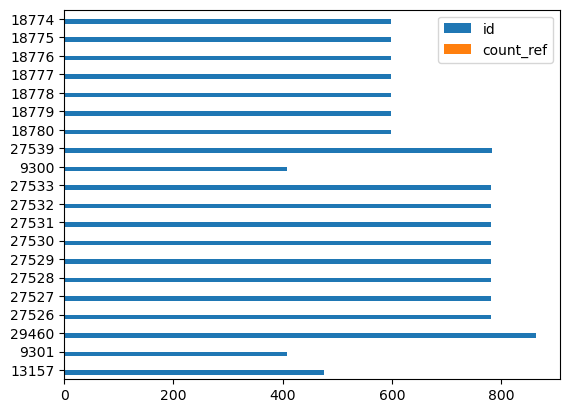

In [34]:
import matplotlib as plt
id_tag_ind_num_check=knn_input.copy()
id_tag_ind_num_check=id_tag_ind_num_check.drop(labels=['index_tags'], axis=1)
id_tag_ind_num_check.sort_values(by='count_ref').head(20).plot.barh()

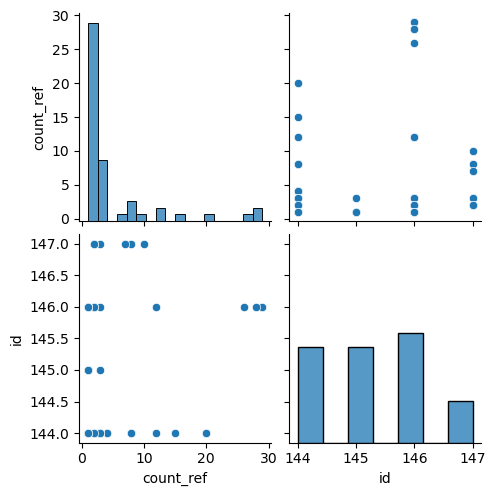

In [35]:
#Lets visualize the model
import seaborn as sns
sns.pairplot(id_tag_ind_num_check[['count_ref', 'id']].head(50))

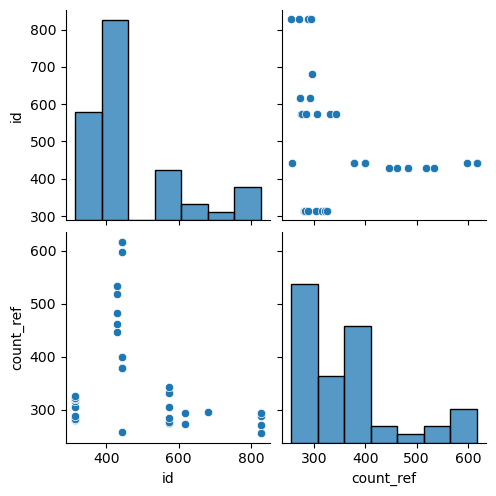

In [63]:
sns.pairplot(id_tag_ind_num_check.sort_values(by='count_ref').tail(50))

##### 4.2.2.2 Run Model Normalized

Normalize the data:

In [36]:
import pandas as pd
from sklearn import preprocessing

knn_input=id_tag_ind_num[['id','index_tags','count_ref']].copy()

array_support = knn_input[['count_ref']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(array_support)
count_nor_supp = pd.DataFrame(x_scaled)

In [37]:
knn_input_norm=pd.concat([knn_input,count_nor_supp.set_index(knn_input.index)],axis=1)
knn_input_norm=knn_input_norm.drop(labels=['count_ref'], axis=1)
knn_input_norm.columns=knn_input_norm.columns.astype(str).str.replace('0','count_ref')

knn_input_norm.head(5)

,id,index_tags,count_ref
0,144,37,0.030844
1,144,640,0.022727
2,144,307,0.017857
3,144,1192,0.011364
4,144,1366,0.011364


Run the Model with normalized data:

In [38]:
#Source: https://notebook.community/NicolasHug/Surprise/examples/notebooks/KNNBasic_analysis
#knn_input=id_tag_ind_num[['id','index_tags','count_ref']].copy()

from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset
from surprise import KNNBasic
from surprise.accuracy import rmse
from surprise.accuracy import mse
from surprise.accuracy import mae


reader = Reader(rating_scale =(min(knn_input_norm.count_ref), max(knn_input_norm.count_ref)))
df_user_model = Dataset.load_from_df(knn_input_norm[["id", "index_tags",'count_ref']], reader)
#trainset_1 = df_user_model.build_full_trainset()


#Split of training and test data
trainset_SVD, testset_SVD = train_test_split(df_user_model, test_size=0.25)

In [39]:
from surprise.accuracy import rmse
from surprise.accuracy import mse
from surprise.accuracy import mae


#Training models
algo_SVD = SVD()
algo_SVD.fit(trainset_SVD)


# Predict ratings for all pairs (i,j) that are NOT in the training set.
#testset = trainset.build_anti_testset()

predictions_SVD = algo_SVD.test(testset_SVD)
rmse(predictions_SVD)
mse(predictions_SVD)
mae(predictions_SVD)



# subset of the list  predictions
predictions_SVD[0:2]

RMSE: 0.0489
MSE: 0.0024
MAE:  0.0252


[Prediction(uid=292, iid=6843, r_ui=0.00487012987012987, est=0.004502818691688704, details={'was_impossible': False}),
 Prediction(uid=188, iid=9135, r_ui=0.0, est=0.007371399702977828, details={'was_impossible': False})]

##### 4.2.1 Cross Validation -> Plot the error in on n_factor variation

In [40]:
#Lets conduct a cross validation and assess the error along the difference cross validation set
def rmse_vs_factors(algorithm, data):
  """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1)
  100 values 
  Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
  """
  
  rmse_algorithm = []
  
  for k in range(1, 101, 1):
    algo = algorithm(n_factors = k)
    
    #["test_rmse"] is a numpy array with min accuracy value for each testset
    loss_fce = cross_validate(algo, df_user_model, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
    rmse_algorithm.append(loss_fce)
  
  return rmse_algorithm

In [41]:
rmse_svd = rmse_vs_factors(SVD,df_user_model)

In [42]:
def plot_rmse(rmse, algorithm):
  """Returns: sub plots (2x1) of rmse against number of factors. 
     Vertical line in the second subplot identifies the arg for minimum RMSE
    
     Arg: i.) rmse = list of mean RMSE returned by rmse_vs_factors(), ii.) algorithm = STRING! of algo 
  """
  
  plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

  plt.subplot(2,1,1)
  plt.plot(rmse)
  plt.xlim(0,100)
  plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
  plt.ylabel("Mean RMSE (cv=5)")

  plt.subplot(2,1,2)
  plt.plot(rmse)
  plt.xlim(0,50)
  plt.xticks(np.arange(0, 52, step=2))

  plt.xlabel("{0}(n_factor = k)".format(algorithm))
  plt.ylabel("Mean RMSE (cv=5)")
  plt.axvline(np.argmin(rmse), color = "r")

In [43]:
plot_rmse(rmse_svd,"SVD")


TypeError: 'module' object is not callable

#### 4.2.3 Tune Hyperparameters

In [48]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_factors': [4,6,9,11,14,18,20,29],
    'n_epochs': [4,6,9,11,14,18,20,29],
    
             }
gs_SVD = GridSearchCV(SVD, param_grid, measures=['mae'], cv=5)
gs_SVD.fit(df_user_model)


# best RMSE score
print(gs_SVD.best_score['mae'])

# combination of parameters that gave the best RMSE score
print(gs_SVD.best_params['mae'])

0.01307214279112533
{'n_factors': 4, 'n_epochs': 29}


In [49]:
from surprise import accuracy, Dataset
import numpy as np

#Now lets use the tunned hyperparameters for our models
algo_SVD_tune = gs_SVD.best_estimator["mae"]
algo_SVD_tune.fit(trainset_SVD)
predictions_SVD_opt=algo_SVD_tune.test(testset_SVD)


rmse_SVD_tune=accuracy.rmse(predictions_SVD_opt, verbose=True)
mse_SVD_tune=accuracy.mse(predictions_SVD_opt, verbose=True)
mae_SVD_tune=accuracy.mae(predictions_SVD_opt, verbose=True)


RMSE: 0.0282
MSE: 0.0008
MAE:  0.0128


#### 4.2.4 Diplay results

In [51]:
# Let's build a pandas dataframe with all the predictions
def get_Iu_SVN(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset_SVD.ur[trainset_SVD.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui_SVN(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset_SVD.ir[trainset_SVD.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

results_SVD_tune = pd.DataFrame(predictions_SVD_opt, columns=['uid', 'iid', 'rui', 'est', 'details'])    
results_SVD_tune['User_Rated_Hashtags'] = results_SVD_tune.uid.apply(get_Iu_SVN)
results_SVD_tune['User_Rated_Hashtags'] = results_SVD_tune.iid.apply(get_Ui_SVN)
results_SVD_tune['err'] = abs(results_SVD_tune.est - results_SVD_tune.rui)

results_SVD_tune_1=pd.merge(left=results_SVD_tune, right=htags_unique_index[['index_tags', 'uni_que_htags', 'htag_rank']],how='left', left_on=['iid'], right_on=['index_tags'])
results_SVD_tune_2=pd.merge(left=results_SVD_tune_1, right=unique_ids_supp[['InstagramUserId', 'username']],how='left', left_on=['uid'], right_on=['InstagramUserId'])
results_SVD_tune_2=results_SVD_tune_2.drop(columns=['index_tags','InstagramUserId'])

best_predictions_SVD_tune = results_SVD_tune_2.sort_values(by='err')[:10]
worst_predictions_SVD_tune = results_SVD_tune_2.sort_values(by='err')[-10:]
best_predictions_SVD_tune



,uid,iid,rui,est,details,User_Rated_Hashtags,err,uni_que_htags,htag_rank,username
4201,1045,2598,0.0,0.0,{'was_impossible': False},3,0.0,parfoisandfriends,2666,anitadacosta
4245,297,16300,0.0,0.0,{'was_impossible': False},0,0.0,lv,15015,nualagorham
4248,400,2065,0.0,0.0,{'was_impossible': False},9,0.0,goodmorning,2101,a_nitricionista
4251,737,17882,0.0,0.0,{'was_impossible': False},0,0.0,pitbulllove,15015,alexandracortereal_
5784,437,3767,0.0,0.0,{'was_impossible': False},1,0.0,aboutyoupt,3672,pipareosa
5114,644,10119,0.0,0.0,{'was_impossible': False},1,0.0,fontanaditrevi,10438,brunafgferreira1893
6774,552,9062,0.0,0.0,{'was_impossible': False},1,0.0,haircare,8473,myblueberrynightsblog
4265,171,10272,0.0,0.0,{'was_impossible': False},1,0.0,foreobear,10438,dominiquenugent89
1467,290,1135,0.0,0.0,{'was_impossible': False},10,0.0,primania,1134,liliforberg
681,385,11207,0.0,0.0,{'was_impossible': False},1,0.0,secretgarden,10438,sophiamolen


In [52]:
print(get_Iu_SVN(443))
len(results_SVD_tune_2[results_SVD_tune_2.uid==443])
#trainset_SVD.knows_user(443)
#trainset_SVD.all_users()
#trainset_SVD.ir()

36


12

range(0, 734)

In [53]:
knn_input=id_tag_ind_num[['id','index_tags','count_ref']].copy()

knn_input.columns=knn_input.columns.str.replace("id","user_id")
def get_top_n(predictions, user_id, htags_unique_index, knn_input, n = 10):
    '''Return the top N (default) hashatgs for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    #Peart I.: Surprise docomuntation
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions_SVD:
        top_n[uid].append((iid, est))

    #2. Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    #Part II.: inspired by: https://beckernick.github.io/matrix-factorization-recommender/
    
    #3. Tells how many movies the user has already rated
    user_data = knn_input[knn_input.user_id == (user_id)]
    print('User {0} has already USED {1} HASHTAGS.'.format(user_id, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["user_id" ,"index_tags","count_ref"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["user_id"] == (user_id)].merge(htags_unique_index, how = 'left', left_on = 'index_tags', right_on = 'index_tags')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = knn_input[knn_input.user_id == (user_id) ].sort_values("count_ref", ascending = False).merge\
    (htags_unique_index, how = 'left', left_on = 'index_tags', right_on = 'index_tags')

    return hist_usr, pred_usr


In [54]:
#SVD Recommendations

hist_SVD_124, pred_SVD_124 = get_top_n(predictions_SVD, htags_unique_index = htags_unique_index, user_id = 644, knn_input = knn_input)
hist_SVD_124.head(10)

User 644 has already USED 139 HASHTAGS.


,user_id,index_tags,count_ref,uni_que_htags,count,htag_rank
0,644,1633,20,fcporto,27,1620
1,644,2136,20,soccerworld,20,2101
2,644,2568,16,awaydays,16,2520
3,644,2456,16,ultrasgirl,16,2520
4,644,14,12,porto,880,15
5,644,0,10,portugal,2180,1
6,644,3670,10,ultrasworld,10,3672
7,644,3674,10,ultrasmentality,10,3672
8,644,3766,10,soccerlife,10,3672
9,644,3826,10,soccergirls,10,3672


### 4.3 Compare models

In [55]:
#We will pick the user 644 from the dataset 
print(get_Iu_knn(644))
print(len(results_knn_tune_2[results_knn_tune_2.User_id==644]))
results_knn_tune_2[results_knn_tune_2.User_id == 644].sort_values(by='error')[:10]


103
36


,User_id,Item_id,Real_count,Estimated_Count,Details,User_Rated_Hashtags,error,uni_que_htags,htag_rank,username
3246,644,589,2.0,1.775890,"{'actual_k': 3, 'was_impossible': False}",14,0.224110,hairstyle,586,brunafgferreira1893
7141,644,402,1.0,1.373043,"{'actual_k': 3, 'was_impossible': False}",8,0.373043,vacations,402,brunafgferreira1893
4298,644,28,2.0,2.473060,"{'actual_k': 10, 'was_impossible': False}",24,0.473060,photooftheday,29,brunafgferreira1893
1249,644,13,2.0,2.725541,"{'actual_k': 10, 'was_impossible': False}",43,0.725541,travel,13,brunafgferreira1893
4206,644,3360,1.0,2.000000,"{'actual_k': 3, 'was_impossible': False}",4,1.000000,couplelove,3403,brunafgferreira1893
3216,644,147,1.0,2.009883,"{'actual_k': 6, 'was_impossible': False}",12,1.009883,swimwear,147,brunafgferreira1893
948,644,39,4.0,5.358185,"{'actual_k': 10, 'was_impossible': False}",47,1.358185,prozisportugal,40,brunafgferreira1893
3362,644,194,1.0,2.635611,"{'actual_k': 7, 'was_impossible': False}",13,1.635611,gym,195,brunafgferreira1893
5401,644,2820,6.0,7.721488,"{'was_impossible': True, 'reason': 'User and/o...",0,1.721488,somosporto,2825,brunafgferreira1893
5406,644,1710,10.0,7.721488,"{'was_impossible': True, 'reason': 'Not enough...",4,2.278512,football,1738,brunafgferreira1893


In [56]:
#results_SVD_tune[results_SVD_tune.uid == 644].sort_values(by='err')[:10]
print(get_Iu_SVN(644))
print(len(results_SVD_tune_2[results_SVD_tune_2.uid==644]))
results_SVD_tune_2[results_SVD_tune_1.uid == 644].sort_values(by='err')[:10]

100
39


,uid,iid,rui,est,details,User_Rated_Hashtags,err,uni_que_htags,htag_rank,username
5114,644,10119,0.0,0.000000,{'was_impossible': False},1,0.000000,fontanaditrevi,10438,brunafgferreira1893
1523,644,3401,0.0,0.000000,{'was_impossible': False},1,0.000000,sunbathing,3403,brunafgferreira1893
1617,644,5011,0.0,0.000000,{'was_impossible': False},3,0.000000,bikiniseason,4920,brunafgferreira1893
6296,644,537,0.0,0.000000,{'was_impossible': False},12,0.000000,ferias,542,brunafgferreira1893
5365,644,153,0.0,0.000000,{'was_impossible': False},20,0.000000,dress,153,brunafgferreira1893
1972,644,2869,0.0,0.000000,{'was_impossible': False},4,0.000000,zfgirl,2825,brunafgferreira1893
2360,644,1432,0.0,0.000000,{'was_impossible': False},10,0.000000,beachday,1446,brunafgferreira1893
2928,644,733,0.0,0.000000,{'was_impossible': False},3,0.000000,gymgirl,733,brunafgferreira1893
5796,644,2457,0.0,0.000544,{'was_impossible': False},4,0.000544,vacaciones,2520,brunafgferreira1893
6653,644,810,0.0,0.000593,{'was_impossible': False},5,0.000593,gymmotivation,819,brunafgferreira1893
